# Decision Tree

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np

from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

# read Iris data from pydatset
df = data('iris')

df.head()
import acquire

In [2]:
# convert column names to lowercase, replace '.' in column names with '_'
df.columns = [col.lower().replace('.', '_') for col in df]


In [3]:
from sklearn.model_selection import train_test_split

def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test


In [4]:
# split into train, validate, test
train, validate, test = train_validate_test_split(df, target='species', seed=123)

# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['species'])
y_train = train.species

X_validate = validate.drop(columns=['species'])
y_validate = validate.species

X_test = test.drop(columns=['species'])
y_test = test.species


In [5]:
# for classification you can change the algorithm to gini or entropy (information gain).  
# Default is gini.

clf = DecisionTreeClassifier(max_depth=3, random_state=123)
clf

DecisionTreeClassifier(max_depth=3, random_state=123)

In [6]:
# model.fit(X, y)

clf = clf.fit(X_train, y_train)


[Text(241.79999999999998, 332.955, 'petal_length <= 2.6\ngini = 0.667\nsamples = 84\nvalue = [28, 28, 28]\nclass = setosa'),
 Text(120.89999999999999, 237.825, 'gini = 0.0\nsamples = 28\nvalue = [28, 0, 0]\nclass = setosa'),
 Text(362.7, 237.825, 'petal_length <= 4.75\ngini = 0.5\nsamples = 56\nvalue = [0, 28, 28]\nclass = versicolor'),
 Text(241.79999999999998, 142.695, 'gini = 0.0\nsamples = 25\nvalue = [0, 25, 0]\nclass = versicolor'),
 Text(483.59999999999997, 142.695, 'petal_length <= 4.95\ngini = 0.175\nsamples = 31\nvalue = [0, 3, 28]\nclass = virginica'),
 Text(362.7, 47.565, 'gini = 0.5\nsamples = 4\nvalue = [0, 2, 2]\nclass = versicolor'),
 Text(604.5, 47.565, 'gini = 0.071\nsamples = 27\nvalue = [0, 1, 26]\nclass = virginica')]

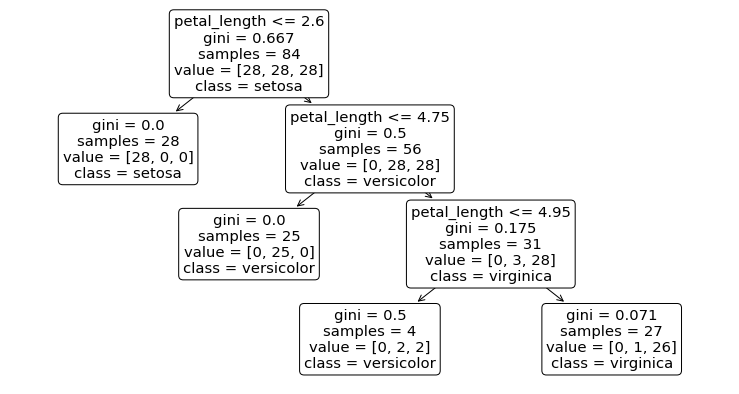

In [7]:
plt.figure(figsize=(13, 7))
plot_tree(clf, feature_names=X_train.columns, class_names=clf.classes_, rounded=True)


In [8]:
# to the left we classified 13 of data left is yes

In [9]:
# make prediction on train obeservations

y_pred = clf.predict(X_train)
y_pred[0:5]


array(['versicolor', 'setosa', 'virginica', 'versicolor', 'setosa'],
      dtype=object)

In [10]:
# Estimate Probability

y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:5]



array([[0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.03703704, 0.96296296],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ]])

## Evaluate Model


In [11]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))


Accuracy of Decision Tree classifier on training set: 0.96


Create a confusion matrix

 - True Positive: number of occurrences where y is true and y is predicted true.
 - True Negative: number of occurrences where y is false and y is predicted false.
 - False Positive: number of occurrences where y is false and y is predicted true.
 - False Negative: number of occurrences where y is true and y is predicted false.

In [12]:
# confusion matrix

confusion_matrix(y_train, y_pred)


array([[28,  0,  0],
       [ 0, 27,  1],
       [ 0,  2, 26]])

In [13]:
y_train.value_counts()


versicolor    28
setosa        28
virginica     28
Name: species, dtype: int64

In [14]:
import pandas as pd

labels = sorted(y_train.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)


,setosa,versicolor,virginica
setosa,28,0,0
versicolor,0,27,1
virginica,0,2,26


In [15]:
print(classification_report(y_train, y_pred))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        28
  versicolor       0.93      0.96      0.95        28
   virginica       0.96      0.93      0.95        28

    accuracy                           0.96        84
   macro avg       0.96      0.96      0.96        84
weighted avg       0.96      0.96      0.96        84



## Evaluate the Model with our Validate dataset

In [16]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(clf.score(X_validate, y_validate)))


Accuracy of Decision Tree classifier on validate set: 0.94


In [17]:
# And since accuracy isn't everything

# Produce y_predictions that come from the X_validate
y_pred = clf.predict(X_validate)

# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_validate, y_pred))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.86      1.00      0.92        12
   virginica       1.00      0.83      0.91        12

    accuracy                           0.94        36
   macro avg       0.95      0.94      0.94        36
weighted avg       0.95      0.94      0.94        36



# Titanic Decision Tree

In [18]:
df_titanic = acquire.get_titanic_data()
train, validate, test = acquire.prep_titanic_data(df_titanic)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 301 to 3
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 498 non-null    int64  
 1   pclass                   498 non-null    int64  
 2   age                      498 non-null    float64
 3   sibsp                    498 non-null    int64  
 4   parch                    498 non-null    int64  
 5   fare                     498 non-null    float64
 6   alone                    498 non-null    int64  
 7   sex_male                 498 non-null    uint8  
 8   embark_town_Queenstown   498 non-null    uint8  
 9   embark_town_Southampton  498 non-null    uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 32.6 KB


In [19]:
# split into train, validate, test
train, validate, test = train_validate_test_split(train, target='survived', seed=123)

# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived




In [20]:
clf = DecisionTreeClassifier(max_depth=4, random_state=123)
clf

DecisionTreeClassifier(max_depth=4, random_state=123)

In [21]:
clf = clf.fit(X_train, y_train)
clf

DecisionTreeClassifier(max_depth=4, random_state=123)

[Text(533.5875000000001, 440.31600000000003, 'sex_male <= 0.5\ngini = 0.474\nsamples = 278\nvalue = [171, 107]\nclass = perished'),
 Text(355.725, 342.468, 'pclass <= 2.5\ngini = 0.422\nsamples = 109\nvalue = [33, 76]\nclass = survived'),
 Text(189.72000000000003, 244.62, 'age <= 49.5\ngini = 0.107\nsamples = 53\nvalue = [3, 50]\nclass = survived'),
 Text(94.86000000000001, 146.772, 'age <= 27.5\ngini = 0.078\nsamples = 49\nvalue = [2, 47]\nclass = survived'),
 Text(47.43000000000001, 48.924000000000035, 'gini = 0.198\nsamples = 18\nvalue = [2, 16]\nclass = survived'),
 Text(142.29000000000002, 48.924000000000035, 'gini = 0.0\nsamples = 31\nvalue = [0, 31]\nclass = survived'),
 Text(284.58000000000004, 146.772, 'age <= 52.0\ngini = 0.375\nsamples = 4\nvalue = [1, 3]\nclass = survived'),
 Text(237.15000000000003, 48.924000000000035, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = perished'),
 Text(332.01000000000005, 48.924000000000035, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass 

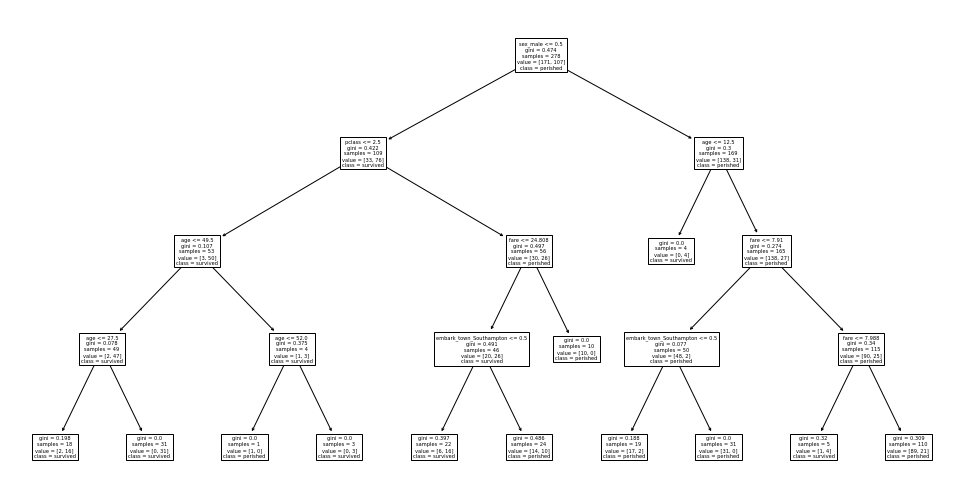

In [22]:
# plt.figure(figsize=(13, 7))
# plot_tree(titanic_clf, feature_names=X_train.columns, class_names =titanic_clf.classes_, rounded=True)



plt.figure(figsize=(17, 9))
plot_tree(clf, feature_names= X_train.columns, class_names = np.array(["perished","survived"]) , rounded=False)

In [23]:
y_pred = clf.predict(X_train)
y_pred[0:5]


array([0, 0, 0, 0, 0])

In [24]:
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:5]

array([[0.80909091, 0.19090909],
       [0.89473684, 0.10526316],
       [0.80909091, 0.19090909],
       [0.80909091, 0.19090909],
       [1.        , 0.        ]])

In [25]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(clf.score(X_validate, y_validate)))


Accuracy of Decision Tree classifier on validate set: 0.77


In [26]:
y_pred = clf.predict(X_validate)

# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_validate, y_pred))


              precision    recall  f1-score   support

           0       0.77      0.88      0.82        74
           1       0.75      0.59      0.66        46

    accuracy                           0.77       120
   macro avg       0.76      0.73      0.74       120
weighted avg       0.76      0.77      0.76       120



# Telco Decision Tree

In [27]:
telco_df = acquire.new_telco_data()
train, validate, test = acquire.prep_telco_data(telco_df)
train.head()

,senior_citizen,tenure,monthly_charges,total_charges,gender_Male,partner_Yes,dependents_Yes,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5919,0,58,71.10,4299.200195,0,0,0,0,1,0,...,0,1,0,1,0,0,0,1,0,0
1915,0,71,85.45,6028.950195,1,0,1,0,1,0,...,0,1,0,1,0,1,0,1,0,0
5054,0,35,25.75,882.549988,0,1,1,0,1,1,...,0,1,0,0,0,0,1,0,1,0
2355,0,1,19.20,19.200001,1,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1
6279,1,20,54.00,1055.900024,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3937 entries, 5919 to 4192
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   senior_citizen                         3937 non-null   int64  
 1   tenure                                 3937 non-null   int64  
 2   monthly_charges                        3937 non-null   float64
 3   total_charges                          3937 non-null   float32
 4   gender_Male                            3937 non-null   uint8  
 5   partner_Yes                            3937 non-null   uint8  
 6   dependents_Yes                         3937 non-null   uint8  
 7   multiple_lines_No phone service        3937 non-null   uint8  
 8   multiple_lines_Yes                     3937 non-null   uint8  
 9   online_security_No internet service    3937 non-null   uint8  
 10  online_security_Yes                    3937 non-null   uint8  
 11  o

In [29]:
train, validate, test = train_validate_test_split(train, target = "churn_Yes", seed =123)
# train, validate, test = train_validate_test_split(train, target='survived', seed=123)
# create X & y version of train, where y is a series with just the target variable and X are all the features. 

# X_train = train.drop(columns=['survived'])
# y_train = train.survived

# X_validate = validate.drop(columns=['survived'])
# y_validate = validate.survived

# X_test = test.drop(columns=['survived'])
# y_test = test.survived

X_train = train.drop(columns = ["churn_Yes"])
y_train = train.churn_Yes

X_validate = validate.drop(columns = ["churn_Yes"])
y_validate = validate.churn_Yes

X_test = test.drop(columns = ["churn_Yes"])
y_test = test.churn_Yes


In [30]:
# for classification you can change the algorithm to gini or entropy (information gain).  
# Default is gini.
clf = DecisionTreeClassifier(max_depth=5, random_state=123)
clf

DecisionTreeClassifier(max_depth=5, random_state=123)

In [31]:
# model.fit(X, y)

clf = clf.fit(X_train, y_train)
clf

DecisionTreeClassifier(max_depth=5, random_state=123)

[Text(362.7, 348.81, 'tenure <= 9.5\ngini = 0.39\nsamples = 2204\nvalue = [1618, 586]\nclass = churn'),
 Text(181.35, 285.39, 'internet_service_type_Fiber optic <= 0.5\ngini = 0.5\nsamples = 566\nvalue = [281, 285]\nclass = no churn'),
 Text(90.675, 221.97, 'tenure <= 3.5\ngini = 0.464\nsamples = 325\nvalue = [206, 119]\nclass = churn'),
 Text(45.3375, 158.55, 'device_protection_No internet service <= 0.5\ngini = 0.499\nsamples = 194\nvalue = [102, 92]\nclass = churn'),
 Text(22.66875, 95.13, 'monthly_charges <= 60.475\ngini = 0.482\nsamples = 111\nvalue = [45, 66]\nclass = no churn'),
 Text(11.334375, 31.710000000000036, 'gini = 0.466\nsamples = 103\nvalue = [38, 65]\nclass = no churn'),
 Text(34.003125, 31.710000000000036, 'gini = 0.219\nsamples = 8\nvalue = [7, 1]\nclass = churn'),
 Text(68.00625, 95.13, 'total_charges <= 38.75\ngini = 0.43\nsamples = 83\nvalue = [57, 26]\nclass = churn'),
 Text(56.671875, 31.710000000000036, 'gini = 0.484\nsamples = 56\nvalue = [33, 23]\nclass = ch

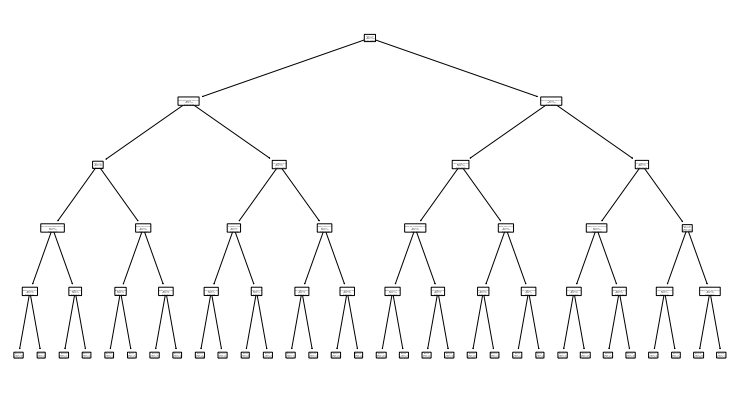

In [32]:
# plotting the decision tree for better visualization(too big for visuals)
plt.figure(figsize=(13, 7))
plot_tree(clf, feature_names=X_train.columns, class_names=np.array(["churn", "no churn"]), rounded=True)

In [33]:
y_pred = clf.predict(X_train)
y_pred[0:5]


array([0, 0, 0, 1, 0], dtype=uint8)

In [34]:
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:5]

array([[0.98648649, 0.01351351],
       [0.52380952, 0.47619048],
       [0.92473118, 0.07526882],
       [0.2892562 , 0.7107438 ],
       [0.92420538, 0.07579462]])

In [35]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(clf.score(X_validate, y_validate)))


Accuracy of Decision Tree classifier on validate set: 0.80


In [36]:
y_pred = clf.predict(X_validate)

# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_validate, y_pred))


              precision    recall  f1-score   support

           0       0.84      0.90      0.87       694
           1       0.66      0.51      0.58       251

    accuracy                           0.80       945
   macro avg       0.75      0.71      0.72       945
weighted avg       0.79      0.80      0.79       945

